In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/data/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903.0,0.0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0.0,98200.0,0.0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.0,181640.0,0.0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0.0,176907.0,0.0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080.0,0.0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [3]:
#Getting summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127363 entries, 0 to 127362
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                127363 non-null  object 
 1   name              127363 non-null  object 
 2   popularity        127362 non-null  float64
 3   duration_ms       127362 non-null  float64
 4   explicit          127362 non-null  float64
 5   artists           127362 non-null  object 
 6   id_artists        127362 non-null  object 
 7   release_date      127362 non-null  object 
 8   danceability      127362 non-null  float64
 9   energy            127362 non-null  float64
 10  key               127362 non-null  float64
 11  loudness          127362 non-null  float64
 12  mode              127362 non-null  float64
 13  speechiness       127362 non-null  float64
 14  acousticness      127362 non-null  float64
 15  instrumentalness  127362 non-null  float64
 16  liveness          12

In [4]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,127362.000000,1.273620e+05,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000
mean,29.187246,2.329308e+05,0.041496,0.543076,0.476704,5.193535,-11.615783,0.697665,0.100446,0.519170,0.179951,0.207102,0.533931,116.482535,3.852994
std,23.796743,1.389849e+05,0.199435,0.172396,0.265641,3.508067,5.543662,0.459271,0.175700,0.374883,0.323084,0.175596,0.263037,29.974235,0.506865
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.695070e+05,0.000000,0.424000,0.252000,2.000000,-14.703000,0.000000,0.034800,0.117000,0.000000,0.098800,0.321000,93.726000,4.000000
50%,31.000000,2.077600e+05,0.000000,0.556000,0.458000,5.000000,-10.753000,1.000000,0.044700,0.559000,0.000295,0.137000,0.546000,115.216500,4.000000
75%,48.000000,2.654130e+05,0.000000,0.672000,0.695000,8.000000,-7.490000,1.000000,0.072500,0.905000,0.156000,0.263000,0.755000,134.232000,4.000000
max,100.000000,4.800118e+06,1.000000,0.988000,1.000000,11.000000,4.584000,1.000000,0.970000,0.996000,1.000000,1.000000,1.000000,243.507000,5.000000


In [5]:
df['duration_ms'] = df['duration_ms']/1000
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000,127362.000000
mean,29.187246,232.930774,0.041496,0.543076,0.476704,5.193535,-11.615783,0.697665,0.100446,0.519170,0.179951,0.207102,0.533931,116.482535,3.852994
std,23.796743,138.984933,0.199435,0.172396,0.265641,3.508067,5.543662,0.459271,0.175700,0.374883,0.323084,0.175596,0.263037,29.974235,0.506865
min,0.000000,3.344000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,169.507000,0.000000,0.424000,0.252000,2.000000,-14.703000,0.000000,0.034800,0.117000,0.000000,0.098800,0.321000,93.726000,4.000000
50%,31.000000,207.760000,0.000000,0.556000,0.458000,5.000000,-10.753000,1.000000,0.044700,0.559000,0.000295,0.137000,0.546000,115.216500,4.000000
75%,48.000000,265.413000,0.000000,0.672000,0.695000,8.000000,-7.490000,1.000000,0.072500,0.905000,0.156000,0.263000,0.755000,134.232000,4.000000
max,100.000000,4800.118000,1.000000,0.988000,1.000000,11.000000,4.584000,1.000000,0.970000,0.996000,1.000000,1.000000,1.000000,243.507000,5.000000


In [6]:
#We will take tracks from 1min to 20 min
df = df.query('duration_ms>=60 and duration_ms<=1200')

In [7]:
#Unuseful features 
df_tracks = df.drop(['id', 'id_artists'], axis=1)

#Remove brackets and single quotes from artists column
df_tracks['artists'] = df_tracks['artists'].str.replace(r'\[|\]|,', '')
df_tracks['artists'] = df_tracks['artists'].str.replace(r"'", '')

df_tracks.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6.0,126.903,0.0,Uli,1922-02-22,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,Capítulo 2.16 - Banquero Anarquista,0.0,98.200,0.0,Fernando Pessoa,1922-06-01,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,Vivo para Quererte - Remasterizado,0.0,181.640,0.0,Ignacio Corsini,1922-03-21,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,El Prisionero - Remasterizado,0.0,176.907,0.0,Ignacio Corsini,1922-03-21,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,Lady of the Evening,0.0,163.080,0.0,Dick Haymes,1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


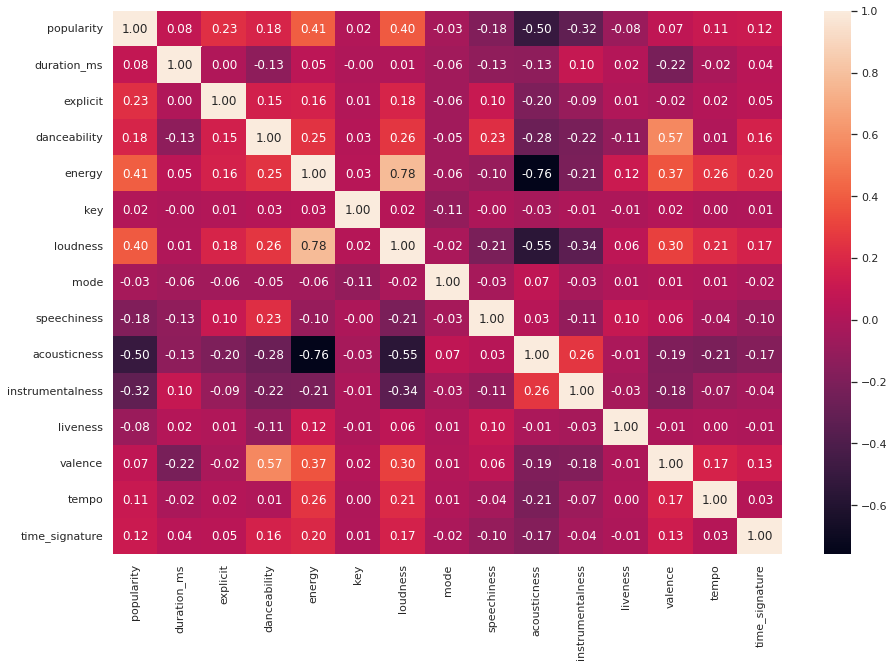

In [8]:
#plot a heatmap in order to check correlations between numerical features
seaborn.set(rc={'figure.figsize':(15,10)})
seaborn.heatmap(df_tracks.corr(), annot=True, fmt=".2f")

# **What feature are necessary for a song to become a hit?**

In [9]:
df_tracks.sort_values(by="popularity", ascending=False).head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,Peaches (feat. Daniel Caesar & Giveon),100.0,198.082,1.0,Justin Bieber Daniel Caesar Giveon,2021-03-19,0.677,0.696,0.0,-6.181,1.0,0.1190,0.3210,0.000000,0.420,0.464,90.030,4.0
93803,drivers license,99.0,242.014,1.0,Olivia Rodrigo,2021-01-08,0.585,0.436,10.0,-8.761,1.0,0.0601,0.7210,0.000013,0.105,0.132,143.874,4.0
93804,Astronaut In The Ocean,98.0,132.780,0.0,Masked Wolf,2021-01-06,0.778,0.695,4.0,-6.865,0.0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4.0
92810,Save Your Tears,97.0,215.627,1.0,The Weeknd,2020-03-20,0.680,0.826,0.0,-5.487,1.0,0.0309,0.0212,0.000012,0.543,0.644,118.051,4.0
92811,telepatía,97.0,160.191,0.0,Kali Uchis,2020-12-04,0.653,0.524,11.0,-9.016,0.0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcddcfbed0>,
      dtype=object)

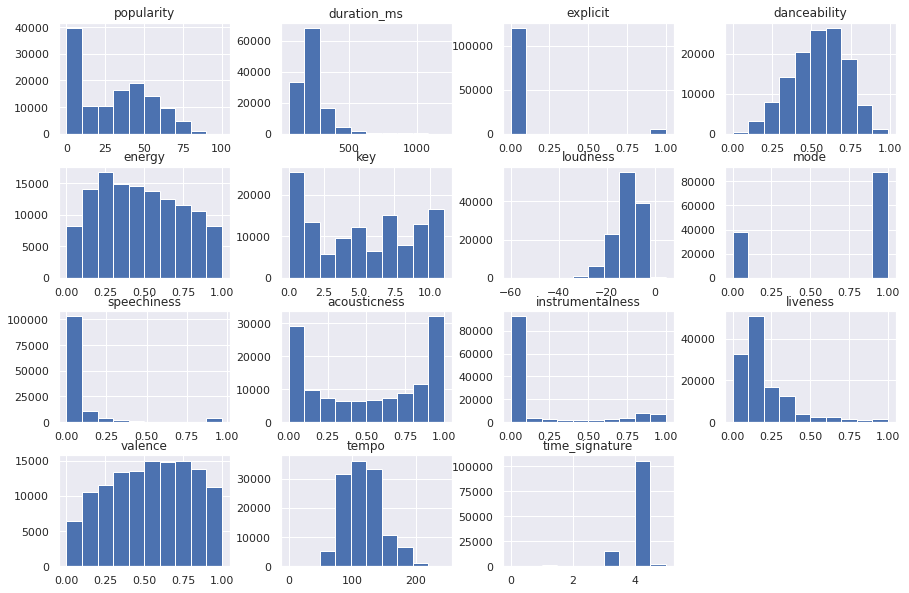

In [10]:
df_tracks.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcd7ce54d0>,
      dtype=object)

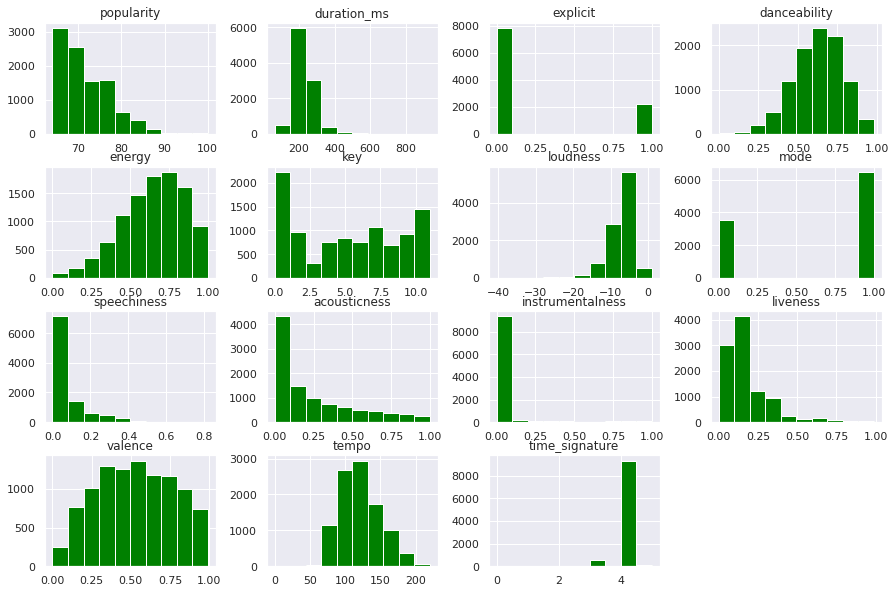

In [13]:
#show hist from top 10000 popular traks, compare with last one
df_top_10000 = df_tracks.sort_values(by='popularity', ascending=False).head(10000)
df_top_10000.hist(color='green')

In [15]:
df_tracks_popular = df_tracks.groupby(by='popularity').mean().reset_index()
df_tracks_popular

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.0,221.523579,0.008958,0.514260,0.308320,5.055366,-14.677575,0.710238,0.180506,0.810711,0.340286,0.216161,0.508432,110.020211,3.750000
1,1.0,207.898517,0.013982,0.528644,0.345010,5.443927,-14.626591,0.683659,0.221798,0.703658,0.255244,0.215605,0.479144,113.439156,3.781241
2,2.0,221.224608,0.014602,0.531356,0.406381,5.327745,-12.749103,0.710654,0.157344,0.667501,0.275020,0.217367,0.515121,115.205193,3.820443
3,3.0,219.628500,0.006613,0.517802,0.401637,5.283615,-12.565905,0.741367,0.095910,0.698243,0.272745,0.228518,0.526341,115.181744,3.855253
4,4.0,214.952826,0.011530,0.512393,0.398790,5.128363,-12.515301,0.736357,0.077399,0.690854,0.265436,0.224824,0.504541,114.746725,3.853190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,221.068000,0.000000,0.550000,0.673000,3.000000,-6.949000,1.000000,0.046100,0.091730,0.000048,0.091200,0.526500,159.546500,4.000000
97,97.0,187.909000,0.500000,0.666500,0.675000,5.500000,-7.251500,0.500000,0.040550,0.066600,0.000006,0.373000,0.598500,101.010500,4.000000
98,98.0,132.780000,0.000000,0.778000,0.695000,4.000000,-6.865000,0.000000,0.091300,0.175000,0.000000,0.150000,0.472000,149.996000,4.000000
99,99.0,242.014000,1.000000,0.585000,0.436000,10.000000,-8.761000,1.000000,0.060100,0.721000,0.000013,0.105000,0.132000,143.874000,4.000000


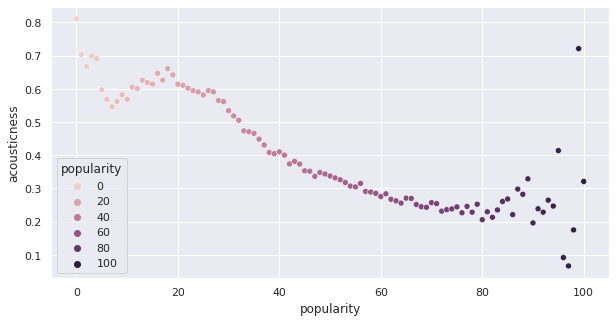

In [17]:
#Lets plot popularity against acousticness
seaborn.set(rc={'figure.figsize':(10,5)})
seaborn.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'acousticness', hue = 'popularity')

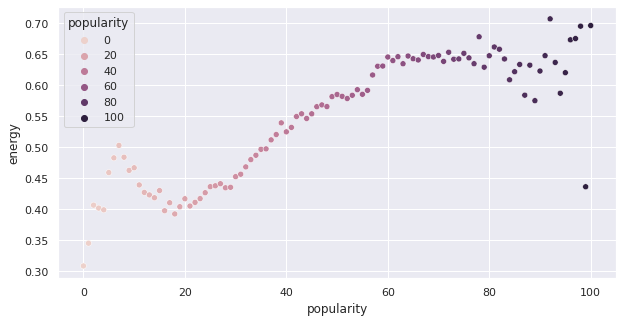

In [19]:
#Lets plot popularity against energy
seaborn.set(rc={'figure.figsize':(10,5)})
seaborn.scatterplot(data = df_tracks_popular, x = 'popularity', y = 'energy', hue = 'popularity')

**Relevant features for a song to become a hit:**



*   Less Acousticness
*   Less Instrumental
*   More Energetic
*   More Explicit
*   More danceable
*   Higher Loudness

**No relevant features:**

*   Speechiness
*   Valence



# Is a song that sounds sadder or angry can be a hit?

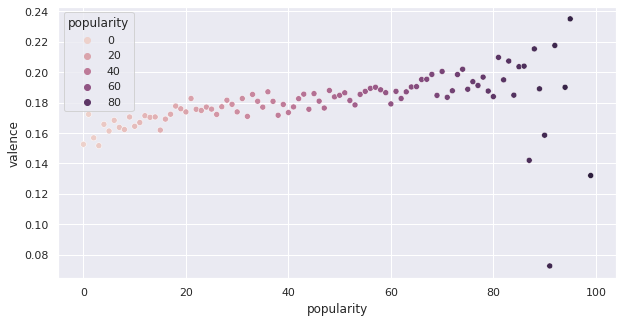

In [20]:
#Subset data to only tracks with valance below 0.3 and then we compare with popularity
seaborn.set(rc={'figure.figsize':(10,5)})
df_low_valence = df_tracks.query('valence<=0.3')
seaborn.scatterplot(data = df_low_valence.groupby(by = 'popularity').mean().reset_index(), x = 'popularity', y = 'valence',hue = 'popularity')

In [21]:
df_low_valence.sort_values(by = 'popularity', ascending = False).head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93803,drivers license,99.0,242.014,1.0,Olivia Rodrigo,2021-01-08,0.585,0.436,10.0,-8.761,1.0,0.0601,0.7210,0.000013,0.105,0.132,143.874,4.0
92814,The Business,95.0,164.000,0.0,Tiësto,2020-09-16,0.798,0.620,8.0,-7.079,0.0,0.2320,0.4140,0.019200,0.112,0.235,120.031,4.0
91866,Streets,94.0,226.987,1.0,Doja Cat,2019-11-07,0.749,0.463,11.0,-8.433,1.0,0.0828,0.2080,0.037100,0.337,0.190,90.028,4.0
92824,DÁKITI,92.0,205.090,1.0,Bad Bunny Jhay Cortez,2020-10-30,0.731,0.573,4.0,-10.059,0.0,0.0544,0.4010,0.000052,0.113,0.145,109.928,4.0
93811,Hold On,92.0,170.813,0.0,Justin Bieber,2021-03-05,0.658,0.634,1.0,-5.797,0.0,0.0413,0.0106,0.000000,0.132,0.290,139.980,4.0


#What features are important for a song to be danceable?

In [22]:
#Function to create intervals in dataframe given initial, last number, and interval
def getIntervalDataSetMean(df, col, num_start, num_last, interval):
    return df.groupby(pd.cut(df[col], np.arange(num_start, num_last, interval))).mean()

In [23]:
#We need to create ranges for valence
df_tracks_dance = getIntervalDataSetMean(df_tracks, 'danceability', 0, 1.1, 0.1)
df_tracks_dance_range = df_tracks_dance.drop(['danceability'], axis = 1).reset_index()
df_tracks_dance_range['danceability'] = df_tracks_dance_range['danceability'].astype(str)
df_tracks_dance_range

,danceability,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"(0.0, 0.1]",19.038217,326.696541,0.008493,0.160945,4.779193,-21.316921,0.662420,0.043823,0.828550,0.740608,0.179129,0.070048,89.286762,3.685775
1,"(0.1, 0.2]",18.737834,280.468224,0.012245,0.260917,5.039560,-16.916861,0.726531,0.046159,0.772662,0.458339,0.202907,0.141426,105.908773,3.637677
2,"(0.2, 0.3]",21.700121,268.227078,0.015320,0.342374,5.051387,-14.344155,0.725694,0.050197,0.698156,0.294372,0.229463,0.247530,113.134409,3.696864
3,"(0.3, 0.4]",24.687748,250.389380,0.017385,0.402171,5.098152,-12.930904,0.718480,0.054691,0.629076,0.243819,0.229885,0.368908,117.935264,3.761465
4,"(0.4, 0.5]",28.087984,230.873426,0.022324,0.464988,5.187506,-11.674715,0.715458,0.062828,0.558836,0.193355,0.226783,0.475215,119.853008,3.835334
5,"(0.5, 0.6]",30.974370,224.476020,0.028972,0.505514,5.124810,-10.777814,0.715560,0.069684,0.504681,0.150581,0.211216,0.559374,118.554322,3.893150
6,"(0.6, 0.7]",31.211213,217.953872,0.039127,0.513226,5.232081,-10.966707,0.694692,0.144480,0.470708,0.117200,0.195337,0.638703,116.133703,3.898533
7,"(0.7, 0.8]",32.250636,219.491488,0.072386,0.526841,5.291240,-10.713210,0.660239,0.182387,0.419145,0.118741,0.176968,0.694897,114.345013,3.918566
8,"(0.8, 0.9]",38.723952,235.935416,0.162563,0.572277,5.412033,-9.268403,0.618131,0.119578,0.309299,0.131843,0.149958,0.729607,113.957741,3.983695
9,"(0.9, 1.0]",48.388889,237.021229,0.340909,0.578091,5.595960,-8.471357,0.577020,0.149874,0.188759,0.067957,0.140257,0.711791,116.205506,3.989899


In [26]:
# We reescale data
df_dance_range_scale = df_tracks_dance_range.drop(['danceability'], axis = 1)
scaler = MinMaxScaler()
df_dance_range_rescale = pd.DataFrame(scaler.fit_transform( df_dance_range_scale), columns = df_dance_range_scale.columns)
df_dance_range_rescale['danceability'] = df_tracks_dance_range['danceability']
df_dance_range_rescale

,popularity,duration_ms,explicit,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,danceability
0,0.010131,1.000000,0.000000,0.000000,0.000000,0.000000,0.571199,0.000000,1.000000,1.000000,0.433711,0.000000,0.000000,0.136557,"(0.0, 0.1]"
1,0.000000,0.574883,0.011288,0.239657,0.318778,0.342535,1.000000,0.016863,0.912646,0.580363,0.699008,0.108221,0.543803,0.000000,"(0.1, 0.2]"
2,0.099905,0.462314,0.020538,0.434929,0.333258,0.542815,0.994402,0.046004,0.796193,0.336601,0.995291,0.269092,0.780195,0.168039,"(0.2, 0.3]"
3,0.200665,0.298278,0.026752,0.578278,0.390514,0.652834,0.946157,0.078436,0.688219,0.261446,1.000000,0.453120,0.937259,0.351449,"(0.3, 0.4]"
4,0.315340,0.118809,0.041610,0.728866,0.499914,0.750625,0.925942,0.137160,0.578434,0.186424,0.965396,0.614300,1.000000,0.561173,"(0.4, 0.5]"
5,0.412685,0.059978,0.061607,0.826017,0.423153,0.820447,0.926626,0.186635,0.493789,0.122834,0.791709,0.741898,0.957512,0.725319,"(0.5, 0.6]"
6,0.420672,0.000000,0.092158,0.844504,0.554488,0.805742,0.787049,0.726429,0.440688,0.073208,0.614541,0.862174,0.878320,0.740602,"(0.6, 0.7]"
7,0.455728,0.014140,0.192209,0.877143,0.626920,0.825476,0.556606,1.000000,0.360095,0.075498,0.409592,0.947374,0.819801,0.797477,"(0.7, 0.8]"
8,0.674044,0.165359,0.463487,0.986063,0.774812,0.937952,0.274972,0.546712,0.188404,0.094977,0.108244,1.000000,0.807131,0.982385,"(0.8, 0.9]"
9,1.000000,0.175344,1.000000,1.000000,1.000000,1.000000,0.000000,0.765360,0.000000,0.000000,0.000000,0.972987,0.880669,1.000000,"(0.9, 1.0]"


In [27]:
#lets melt data to plot a grid 
df_dance_melt = df_dance_range_rescale.melt(id_vars = ['danceability'], var_name = 'feature', value_name = 'Value')
df_dance_melt

,danceability,feature,Value
0,"(0.0, 0.1]",popularity,0.010131
1,"(0.1, 0.2]",popularity,0.000000
2,"(0.2, 0.3]",popularity,0.099905
3,"(0.3, 0.4]",popularity,0.200665
4,"(0.4, 0.5]",popularity,0.315340
...,...,...,...
135,"(0.5, 0.6]",time_signature,0.725319
136,"(0.6, 0.7]",time_signature,0.740602
137,"(0.7, 0.8]",time_signature,0.797477
138,"(0.8, 0.9]",time_signature,0.982385


In [28]:
df_dance_melt.describe()

,Value
count,140.000000
mean,0.501531
std,0.357266
min,0.000000
25%,0.137009
50%,0.521364
75%,0.821705
max,1.000000


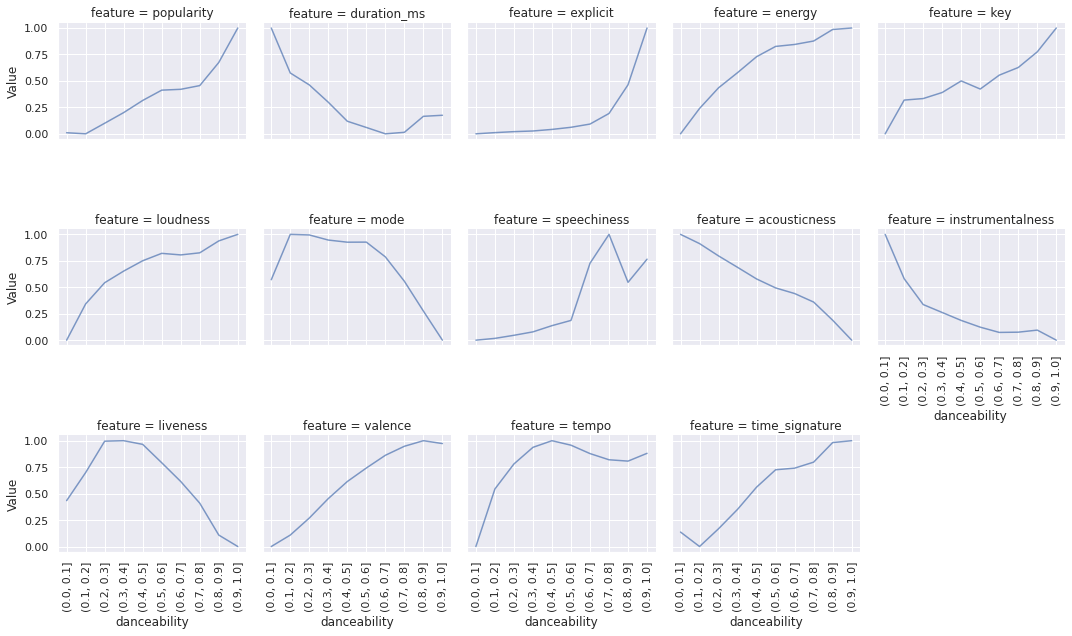

In [29]:
#Plot all features with danceability range
g = seaborn.FacetGrid(df_dance_melt, col="feature", col_wrap = 5)
g.map(seaborn.lineplot, "danceability", "Value", alpha=.7)
for axes in g.axes.flat:
    _ = g.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

**Features for a song to be danceable:**
*   Popularity
*   Explicit
*   Energy
*   Loudness
*   Valence


# Why Qyeen songs are not popular than the rest of the songs that are?


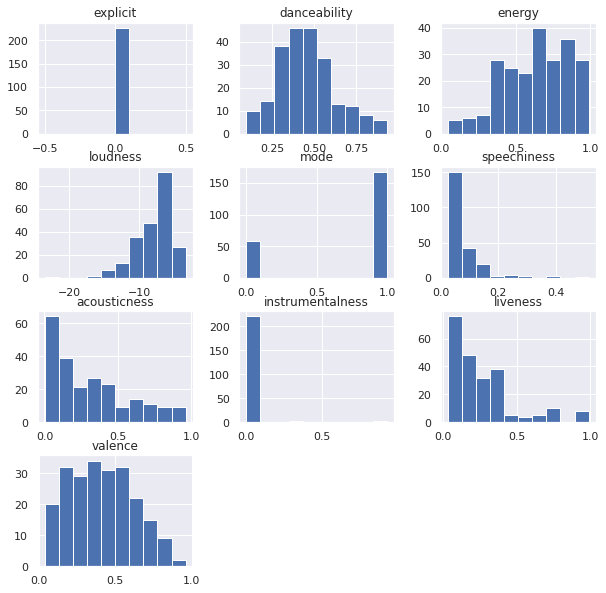

In [32]:
#Plot some hist from Queen songs
seaborn.set(rc={'figure.figsize':(10,10)})
df_queen = df_tracks.query("artists == 'Queen'").drop(['popularity','duration_ms','tempo','key', 'time_signature'], axis = 1)
df_queen.hist();

In [33]:
df_queen_mean = df_queen.groupby(by='artists').mean().transpose()
df_queen_mean

artists,Queen
explicit,0.000000
danceability,0.458625
energy,0.635456
loudness,-7.954850
mode,0.738938
speechiness,0.074704
acousticness,0.306893
instrumentalness,0.019239
liveness,0.264373
valence,0.408851


In [35]:
#drop columns that are not important, select only songs win popuparilty above 80 points
df_tracks_80_popular = df_tracks[df_tracks['popularity']>=80].drop(['popularity','duration_ms','tempo','key', 'time_signature'], axis = 1)
df_tracks_80_popular['artists'] = '80 popularity'

df_queen_mean['80 popularity'] = df_tracks_80_popular.groupby(by='artists').mean().transpose()['80 popularity']

#append two columns
df_comparing = df_queen_mean.reset_index()
df_comparing.columns = ['Feature','Queen', '80 Popularity']
df_comparing['Diff'] = df_comparing['80 Popularity']-df_comparing['Queen']
df_comparing

,Feature,Queen,80 Popularity,Diff
0,explicit,0.000000,0.344573,0.344573
1,danceability,0.458625,0.671682,0.213057
2,energy,0.635456,0.640275,0.004820
3,loudness,-7.954850,-6.304612,1.650237
4,mode,0.738938,0.597471,-0.141467
5,speechiness,0.074704,0.101701,0.026996
6,acousticness,0.306893,0.232836,-0.074057
7,instrumentalness,0.019239,0.010655,-0.008585
8,liveness,0.264373,0.170413,-0.093960
9,valence,0.408851,0.517991,0.109140


In [36]:
#Plot diff values
df_comparing.sort_values(by = 'Diff', ascending = False).style.bar(subset=['Diff'], align = 'mid')

,Feature,Queen,80 Popularity,Diff
3,loudness,-7.954850,-6.304612,1.650237
0,explicit,0.000000,0.344573,0.344573
1,danceability,0.458625,0.671682,0.213057
9,valence,0.408851,0.517991,0.109140
5,speechiness,0.074704,0.101701,0.026996
2,energy,0.635456,0.640275,0.004820
7,instrumentalness,0.019239,0.010655,-0.008585
6,acousticness,0.306893,0.232836,-0.074057
8,liveness,0.264373,0.170413,-0.093960
4,mode,0.738938,0.597471,-0.141467


**Features were Queen fails**

*   Loudness
*   Explicit
*   Danceability